# Módulo 10 atividade 1

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [11]:
previsao = pd.read_csv('previsao_de_renda.csv')
previsao.drop('Unnamed: 0', axis=1, inplace=True)
print(previsao.shape)
previsao.head(5)

(15000, 15)


,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [13]:
previsao.dtypes

data_ref                  object
index                      int64
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
mau                         bool
renda                    float64
dtype: object

Variaves quantitativas: qtd_filhos, idade, tempo_emprego, qt_pessoas_residencia, renda.

In [21]:
vq = ['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']
previsao[vq].head()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
0,1,36,3.575342,3.0,3369.24
1,0,42,0.860274,2.0,6096.14
2,2,31,8.065753,4.0,5658.98
3,0,50,1.208219,2.0,7246.69
4,0,52,13.873973,2.0,4017.37


In [22]:
previsao[vq].corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.009567,0.042570,0.394235,0.020977,1.000000


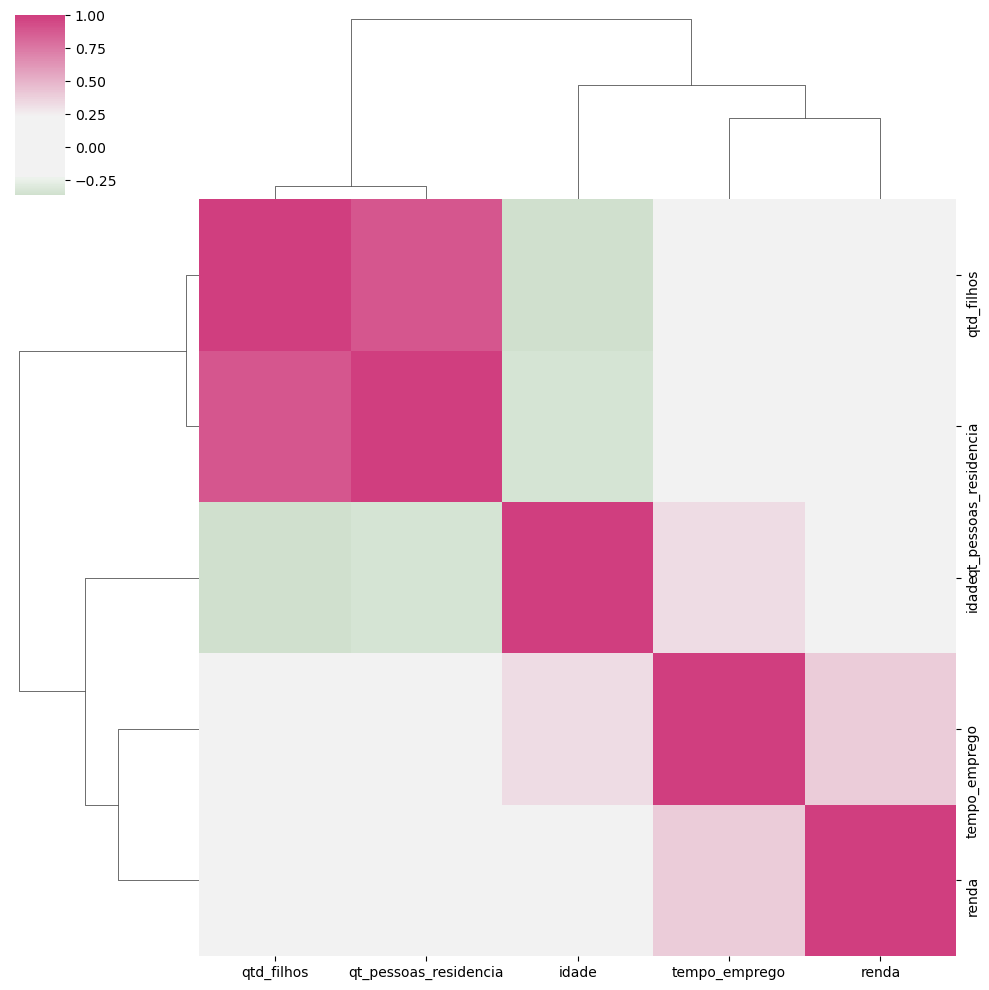

In [31]:
cmap= sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(previsao[vq].corr( ), figsize=(10, 10), center = 0, cmap=cmap)

Podemos ver a relação de renda e tempo_emprego estão próximas, indicando que possivelmente a renda aumentaria ao longo do tempo no emprego.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

Variaves mais correlacionadas são a idade e tempo de emprego.

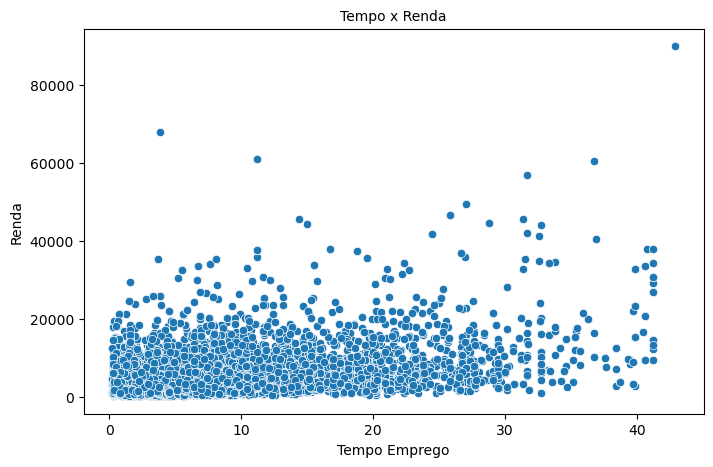

In [47]:
plt.figure(figsize = (8,5))
plt.title('Tempo x Renda', size=10)
sns.scatterplot(x=previsao['tempo_emprego'], y=previsao['renda'])
plt.xlabel('Tempo Emprego')
plt.ylabel('Renda')
plt.show()

Não vejo correlações linear relevantes.

3) Na sua opinião, há outliers na variável renda?

<AxesSubplot:xlabel='renda', ylabel='Count'>

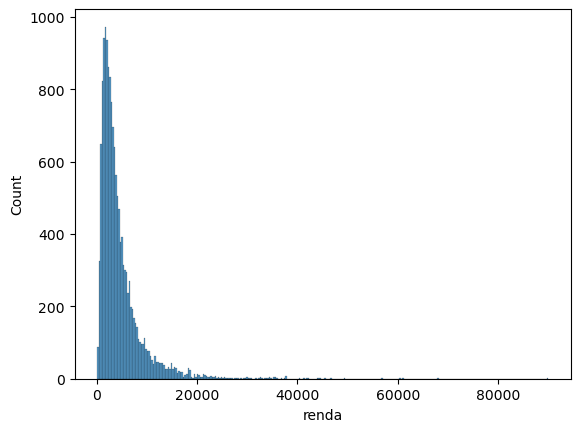

In [52]:
sns.histplot(x=previsao['renda'])

<AxesSubplot:xlabel='renda'>

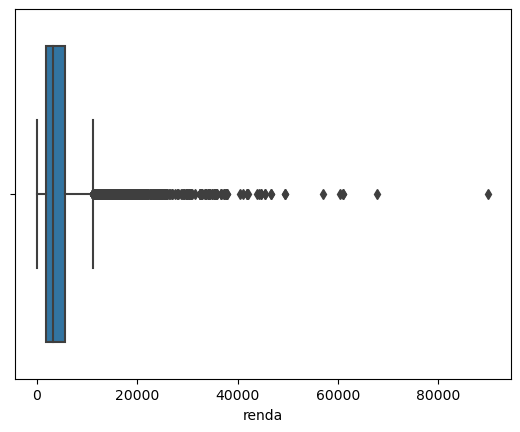

In [55]:
sns.boxplot(x=previsao['renda'])

Existem outliers, na variável renda que prejudicam uma análise mais precisa.


4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [58]:
logaritmo = previsao[vq]
logaritmo.loc[:, 'log_renda'] = np.log(previsao['renda'])
logaritmo.head()

C:\Users\maxsu\AppData\Local\Temp\ipykernel_11888\2242036619.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logaritmo.loc[:, 'log_renda'] = np.log(previsao['renda'])


,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,log_renda
0,1,36,3.575342,3.0,3369.24,8.122442
1,0,42,0.860274,2.0,6096.14,8.715411
2,2,31,8.065753,4.0,5658.98,8.640999
3,0,50,1.208219,2.0,7246.69,8.888300
4,0,52,13.873973,2.0,4017.37,8.298383


In [60]:
logaritmo.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,log_renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567,0.023743
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570,0.024712
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235,0.379556
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977,0.036267
renda,0.009567,0.042570,0.394235,0.020977,1.000000,0.835734
log_renda,0.023743,0.024712,0.379556,0.036267,0.835734,1.000000


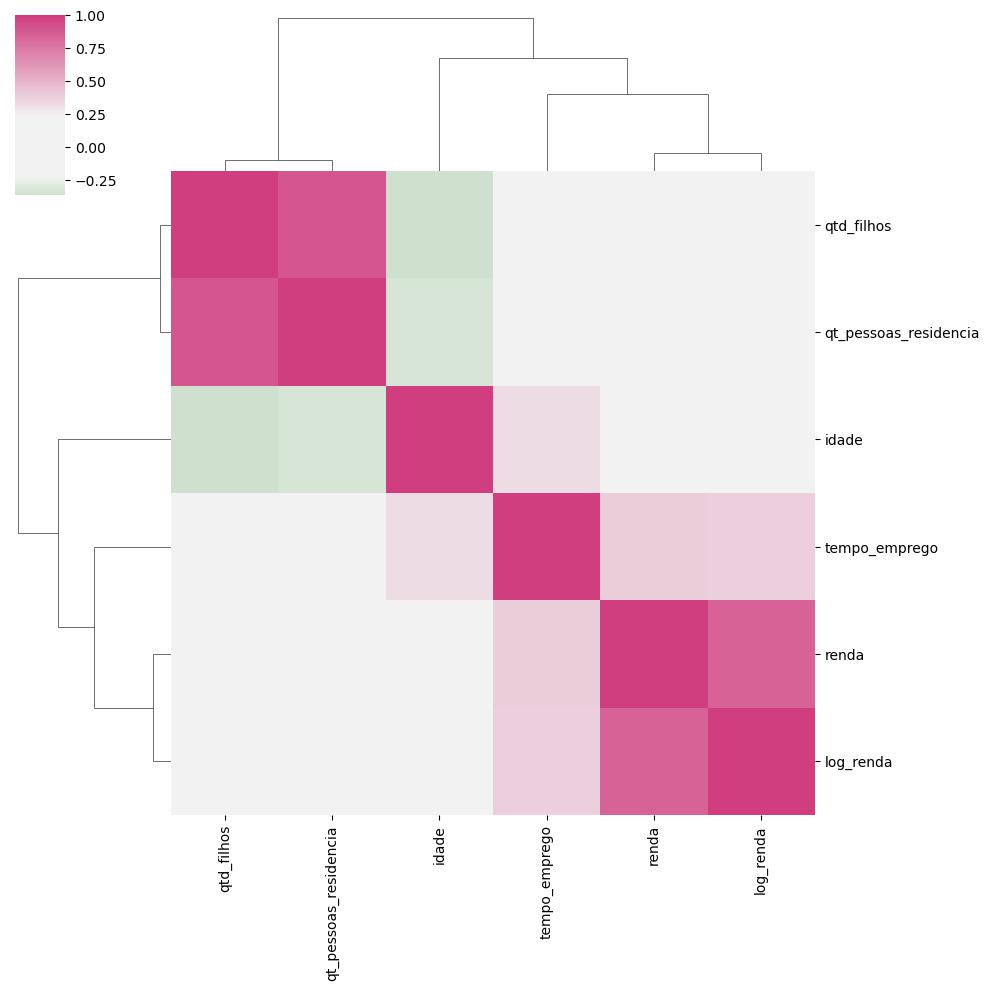

In [61]:
cmap= sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(logaritmo.corr( ), figsize=(10, 10), center = 0, cmap=cmap)

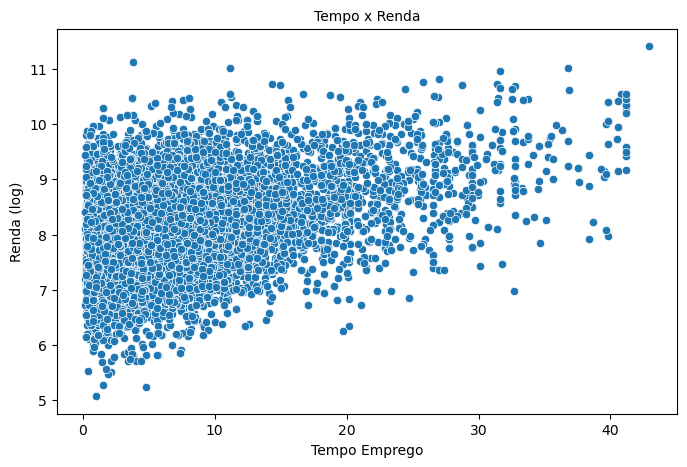

In [67]:
plt.figure(figsize = (8,5))
plt.title('Tempo x Renda', size=10)
sns.scatterplot(x=logaritmo['tempo_emprego'], y=logaritmo['log_renda'])
plt.xlabel('Tempo Emprego')
plt.ylabel('Renda (log)')
plt.show()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Acredito que tenha melhorado a análise, pois vemos uma melhor correlação entre tempo_emprego e renda.